In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [15]:
img = image.load_img("Dataset/testing/clean/Clean_1001.png")

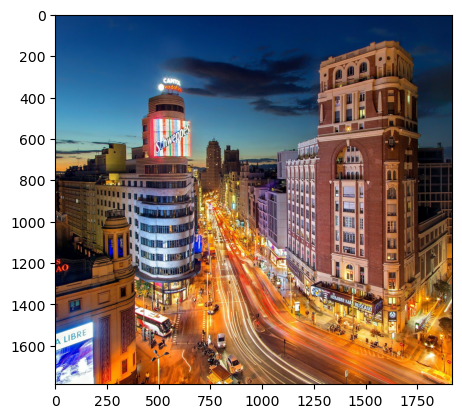

In [17]:
plt.imshow(img)

In [19]:
cv2.imread("Dataset/testing/clean/Clean_1001.png").shape

(1787, 1920, 3)

In [20]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('Dataset/training/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')